***TWITTER SENTIMENT ANALYYSIS***


*IMPORTS*

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
# nltk
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# wordcloud
from wordcloud import WordCloud
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/abhinavdeep/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


*LOADING DATASET*

In [230]:
path = './Dataset/tweets.csv'
data = pd.read_csv(path, encoding="Latin-1", names=['target', 'uid', 'timestamp', 'flag', 'username', 'tweet'])
print("Tweets loaded successfully!")

Tweets loaded successfully!


*EXPLORATORY DATA ANALYSIS*

In [231]:
data.shape

(1600000, 6)

In [232]:
data.head()

,target,uid,timestamp,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [233]:
data.describe()

,target,uid
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [234]:
data.info

<bound method DataFrame.info of          target         uid                     timestamp      flag  \
0             0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1             0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2             0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3             0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4             0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...         ...         ...                           ...       ...   
1599995       4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996       4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997       4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998       4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999       4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                username                                              tweet  
0        _TheSpecialOne_  @switchfoot

In [235]:
data.dtypes

target        int64
uid           int64
timestamp    object
flag         object
username     object
tweet        object
dtype: object

In [236]:
data['target'].unique()

array([0, 4])

In [237]:
data['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

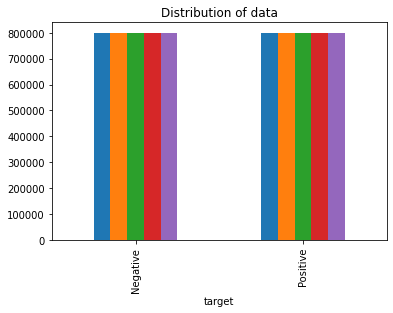

In [238]:
#visualizing data 
#Distribution of data
ax = data.groupby('target').count().plot(kind='bar', title='Distribution of data', legend=False)
ax.set_xticklabels(['Negative', 'Positive'])

text, sentiment = list(data['tweet']), list(data['target'])

In [239]:
ax = data.groupby('target').count()
ax

,uid,timestamp,flag,username,tweet
target,,,,,
0,800000,800000,800000,800000,800000
4,800000,800000,800000,800000,800000


<AxesSubplot:xlabel='target', ylabel='count'>

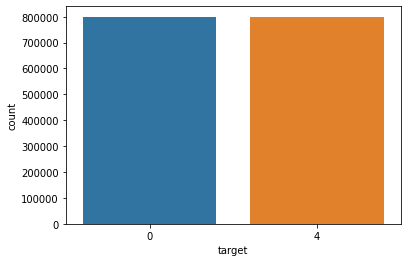

In [240]:
sns.countplot(x='target', data = data)

*DATA PREPROCESSING*

In [241]:
data = data[['tweet', 'target']]
data

,tweet,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1599995,Just woke up. Having no school is the best fee...,4
1599996,TheWDB.com - Very cool to hear old Walt interv...,4
1599997,Are you ready for your MoJo Makeover? Ask me f...,4
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4


In [242]:
data['target'] = data['target'].replace(4, 1)

/tmp/ipykernel_10202/637349435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4, 1)


In [243]:
data['target'].unique()

array([0, 1])

In [244]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [245]:
'''
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]
print(data_pos)
print(data_neg)
'''

'\ndata_pos = data_pos.iloc[:int(20000)]\ndata_neg = data_neg.iloc[:int(20000)]\nprint(data_pos)\nprint(data_neg)\n'

In [246]:
dataset = pd.concat([data_pos, data_neg])
dataset

,tweet,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
799995,Sick Spending my day laying in bed listening ...,0
799996,Gmail is down?,0
799997,rest in peace Farrah! So sad,0
799998,@Eric_Urbane Sounds like a rival is flagging y...,0


In [247]:
# converting tweet body in lowercase
dataset['tweet'] = dataset['tweet'].str.lower()

In [248]:
# defining stopwords
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']
STOPWORDS = set(stopwordlist)
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'more',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'own',
 're',
 's',
 'same',
 'she',
 'shes',
 'should',
 'shouldve',
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 'thatll',
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'we',
 'were

In [249]:
# removing stopwords from data
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['tweeet'] = dataset['tweet'].apply(lambda text: cleaning_stopwords(text))
dataset['tweeet'].head() 

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: tweeet, dtype: object

In [250]:
# removing punctuations
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_punctuations(x))
dataset['tweet'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: tweet, dtype: object

In [251]:
# removing repeating characeters
def cleaning_repeating_chars(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_repeating_chars(x))
dataset['tweet'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: tweet, dtype: object

In [252]:
# removing urls
def cleaning_URLs(text):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',text)
dataset['tweet'] = dataset['tweet'].apply(lambda x: cleaning_URLs(x))
dataset['tweet'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                       gmail is down 
799997                         rest in peace farrah so sad 
799998    ericurbane sounds like a rival is flagging you...
799999    has to resit exams over summer  wishes he work...
Name: tweet, dtype: object

In [253]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['tweet'] = dataset['tweet'].apply(lambda x: lemmatizer_on_text(x))
dataset['tweet'].head()

800000            i love health4uandpets u guys r the best 
800001    im meeting up with one of my besties tonight c...
800002    darealsunisakim thanks for the twitter add sun...
800003    being sick can be really cheap when it hurts t...
800004       lovesbrooklyn2 he has that effect on everyone 
Name: tweet, dtype: object

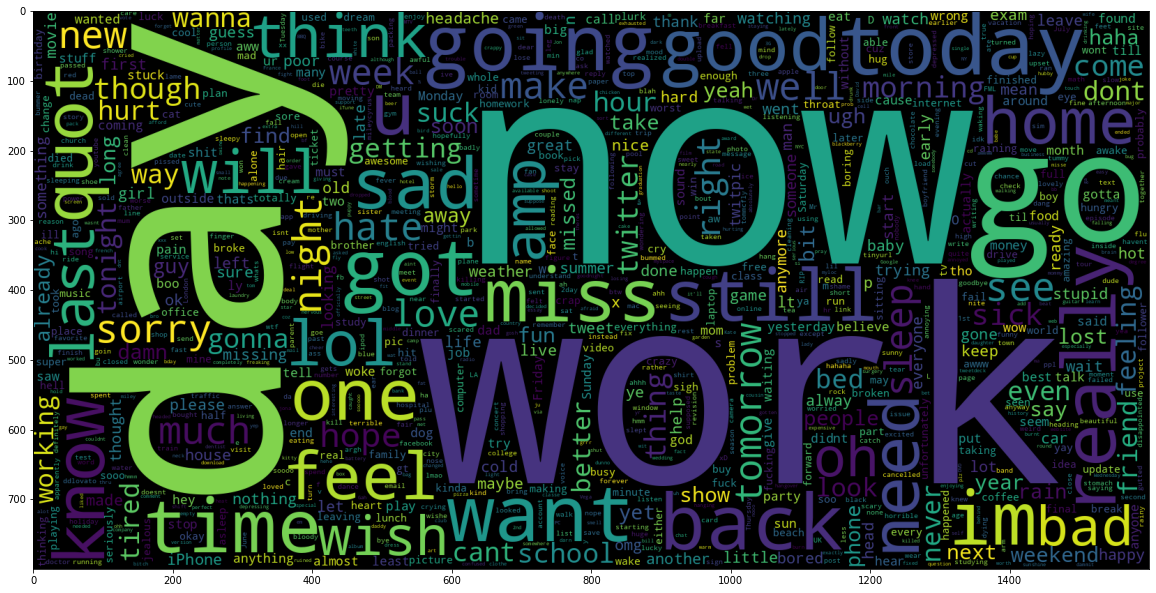

In [254]:
# negative sentiment word cloud
data_neg = data['tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

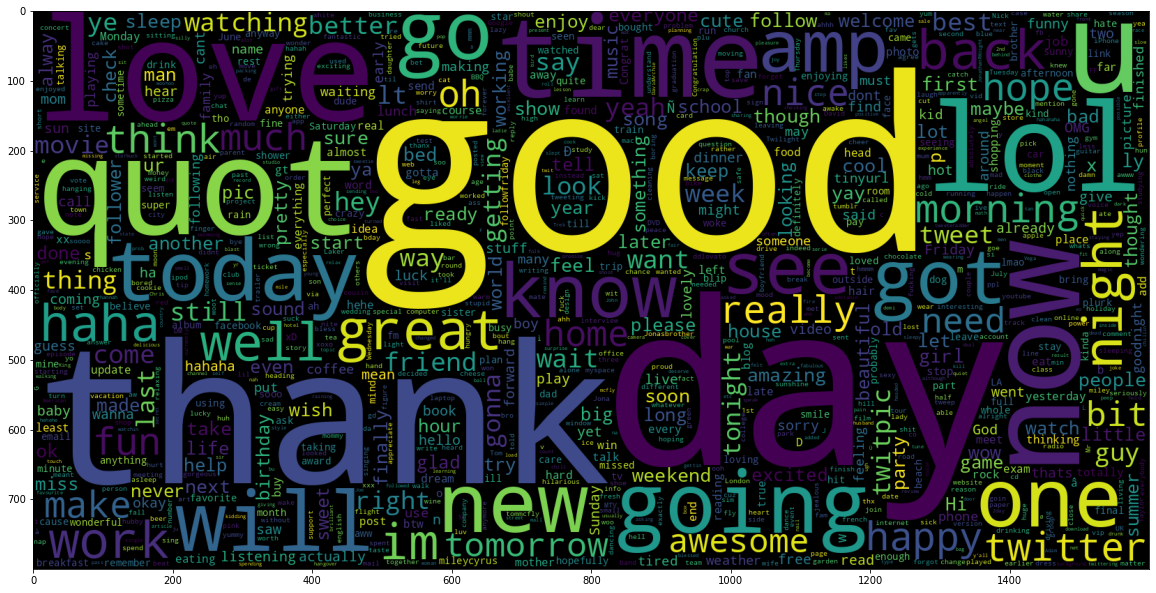

In [255]:
# positive sentiment wordcloud
data_pos = data['tweet'][800000:]
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

*MODEL TRAINING AND TESTING*

In [256]:
X = dataset.tweeet
y = dataset.target

In [257]:
# spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 1)

In [258]:
vectoriser = TfidfVectorizer(ngram_range = (1, 2), max_features = 5000000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names_out()))

No. of feature_words:  5000000


In [259]:
X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)

In [260]:
# creating function to evaluate differnt models
def model_evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Negative', 'False Negative', 'True Positive', 'False Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.79      0.82      0.80     40161
           1       0.81      0.78      0.79     39839

    accuracy                           0.80     80000
   macro avg       0.80      0.80      0.80     80000
weighted avg       0.80      0.80      0.80     80000



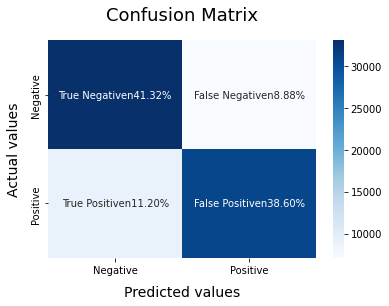

In [261]:
# using Bernoulli's Naive Bayes
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82     40161
           1       0.82      0.81      0.81     39839

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



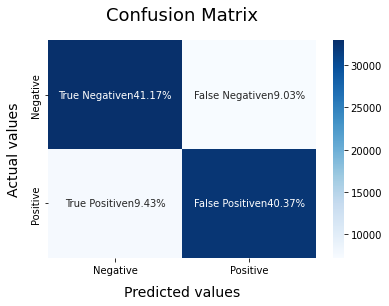

In [262]:
# using Support vector Machine
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     40161
           1       0.82      0.82      0.82     39839

    accuracy                           0.82     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.82      0.82      0.82     80000



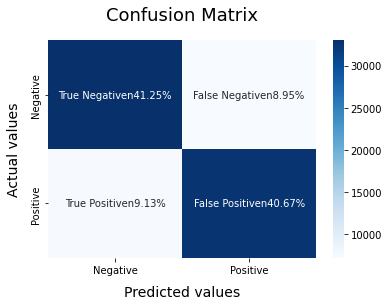

In [263]:
# using Logistic Regression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)